# Exercice 4 : étude d’un pendule (schémas numériques)

On considère un pendule de longueur $l$. L'évolution de $\theta$ l'angle du pendule par rapport à la verticale est donnée par l'équation suivante :
$$
\theta''(t)+\frac{g}{l}\sin(\theta(t))=0.
$$
On définit $\omega=\theta'$, on a ainsi le système 
\begin{equation*}
\left\{
\begin{array}{l}
\theta'(t)=\omega(t) \\
\omega'(t)=-\displaystyle\frac{g}{l}\sin(\theta(t)).
\end{array}
\right.
\end{equation*}
On suppose que $\theta(0)$ et  $\omega(0)$ sont donnés et on prendra $l=5$ et $g=9.81$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy.linalg as LA

##### Parametres
g = 9.81
l = 5.
X0 = np.array([np.pi/3,0])
T = 12.
N = 200

def f(t,X):
    return np.array([X[1], -g/l*np.sin(X[0])])
def df(t,X):
    return np.array([[0, 1],[-g/l*np.cos(X[0]), 0]])

**Q1)** Déterminer la solution approchée de ce système à l'aide d'un schéma d'Euler explicite.

In [3]:
## schema d'Euler explicite
def Euler(X0,N,T):
    dt = T/N
    X = np.zeros([N+1,2])
    X[0] = X0
    ## boucle en temps
    for i in range(0,N):
        X[i+1] = X[i] + dt * f(i*dt,X[i])
    return X


**Q2)** Calculer une solution approchée en utilisant la fonction `solve_ivp` du module `scipy.integrate` qui met en oeuvre la méthode de Runge-Kutta explicite d’ordre 4.

> La syntaxe pour la commande `solve_ivp`  est `sol=integrate.solve_ivp(f,(t0,tf),X0)` où 
> - `f` a été définie de la façon suivante : `def f(t,X): ... ` (même si  `f`  ne dépend pas de `t`, il faut que l'argument apparaisse en seconde position en entrée);
> - `(t0,tf)` est l’intervalle de temps où la solution est calculée
> - `X0` correspond à la condition initiale ;
> - `sol` est un objet contenant les informations sur la solution approchée: 
>   - `sol.t` contient le vecteur des temps où la solution est calculée
>   - `sol.y` contient le tableau où la solution est calculée aux temps `sol.t`
> 
> Remarque : `solve_ivp` choisit automatiquement le pas de temps, pour s’en affranchir on peut utiliser les mots-clefs suivants `sol=integrate.solve_ivp(f,(t0,tf),X0,max_step=dt, atol=1., rtol=1.)` où `dt` est le pas de temps souhaité.

In [4]:
sol_rk4 = integrate.solve_ivp(f,(0.,T),X0,max_step=T/N,rtol=1.,atol=1.) #par défaut, c’est un RK4

**Q3)** Implémenter la solution approchée par la méthode d’Euler implicite.

In [5]:
## methode de Newton
def Newton(f,df,x0,tol,maxiter):
    x = x0
    it = 0
    delta_norm = LA.norm(f(x)) 
    while delta_norm > tol and it < maxiter :
        delta_x = np.dot( LA.inv( df(x) ) , f(x) )
        x = x - delta_x
        it += 1
        delta_norm = LA.norm(f(x))
    return x

## schema d'Euler implicite
## df : jacobienne de f par rapport a l'espace
def Euler_imp(f,df,X0,N,T):
    dt = T/N # pas de temps
    t=0 # temps
    X = np.zeros([N+1,2])
    X[0] = X0
    ## boucle en temps
    for i in range(0,N):
        def F(z):
            return z - X[i] - dt * f(t+dt,z)
        def DF(z):
            return np.identity(2) - dt * df(t+dt,z)
        X[i+1] = Newton(F,DF,X[i],1e-6,10)
        t += dt
    return X

**Q4)** Comparer les solutions données par les trois méthodes.

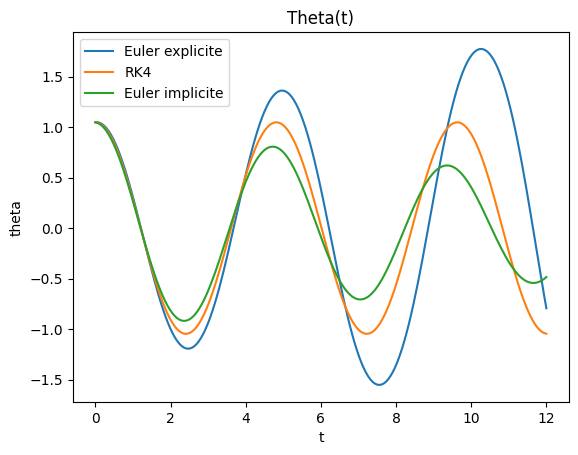

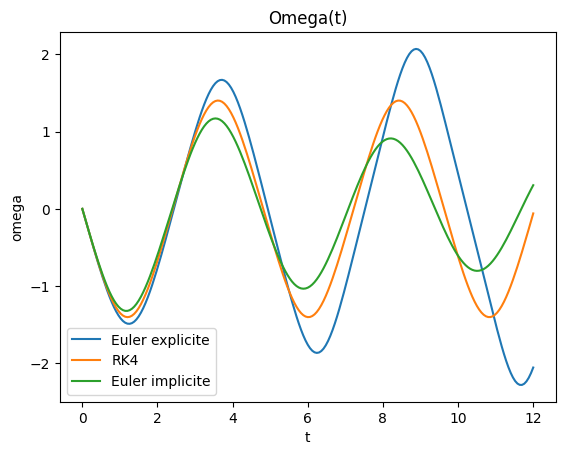

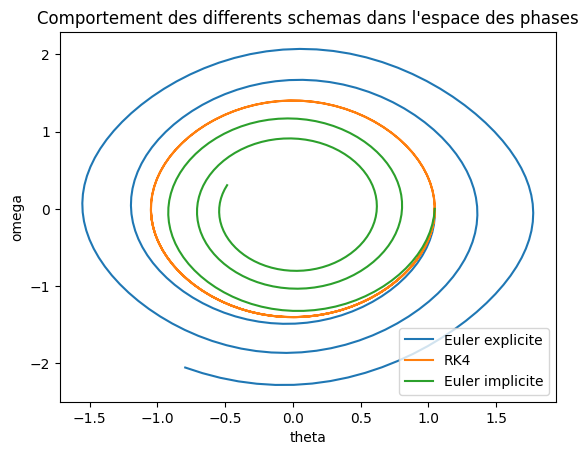

In [6]:
# Euler explicite
X_Euler = Euler(X0,N,T)
theta_Euler , omega_Euler = X_Euler[:,0] , X_Euler[:,1]
# temps
tps = np.linspace(0,T,N+1)
# solve_ivp 
sol_ODE = integrate.solve_ivp(f,(0.,T),X0,max_step=T/N,rtol=1.,atol=1.)
# Euler implicite
sol_EI = Euler_imp(f,df,X0,N,T)
theta_EI, omega_EI = sol_EI[:,0], sol_EI[:,1]


## affichage de theta
plt.figure()
plt.plot(tps,theta_Euler,label="Euler explicite")
plt.plot(sol_ODE.t,sol_ODE.y[0],label="RK4")
plt.plot(tps,theta_EI,label="Euler implicite")
plt.xlabel("t")
plt.ylabel("theta")
plt.title("Theta(t)")
plt.legend()
plt.show()

## affichage de omega
plt.figure()
plt.plot(tps,omega_Euler,label="Euler explicite")
plt.plot(sol_ODE.t,sol_ODE.y[1],label="RK4")
plt.plot(tps,omega_EI,label="Euler implicite")
plt.xlabel("t")
plt.ylabel("omega")
plt.title("Omega(t)")
plt.legend()
plt.show()

## portrait de phases
plt.figure()
plt.plot(theta_Euler,omega_Euler,label="Euler explicite")
plt.plot(sol_ODE.y[0],sol_ODE.y[1],label="RK4")
plt.plot(theta_EI,omega_EI,label="Euler implicite")
plt.xlabel("theta")
plt.ylabel("omega")
plt.title("Comportement des differents schemas dans l'espace des phases")
plt.legend()
plt.show()



**Q5)** On considère l’équation du pendule linéarisé dont la longueur varie:
$$
\theta''(t)+\omega^2 (1+\varepsilon \cos(t)) \theta(t)=0,
$$
avec conditions initiales $\theta(0) = \frac{\pi}{8}$ et $\theta'(0)=0$ et où $\omega$ et $\varepsilon$ sont des constantes.

Pour $(\omega,\varepsilon) = (\frac{1}{2},0.1)$ et $(\omega,\varepsilon) = (1,0.2)$, comparer la méthode d’Euler explicite et Runge-Kutta explicite à l’ordre 4.


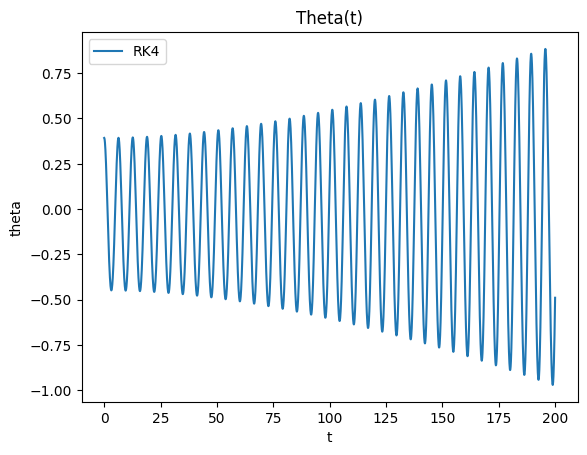

In [7]:
omega = 1
epsilon = 0.2
X0 = np.array([np.pi/8,0.])
T = 200
N = 3000

def f(t,X):
    return np.array([X[1], -omega**2*(1+epsilon*np.cos(t))*X[0]])

X_Euler = Euler(X0,N,T)
sol_rk4 = integrate.solve_ivp(f,(0.,T),X0,max_step=T/N,rtol=1.,atol=1.) #par défaut, c’est un RK4

theta_Euler , omega_Euler = X_Euler[:,0] , X_Euler[:,1]
# temps
tps = np.linspace(0,T,N+1)

## affichage de theta
plt.figure()
#plt.plot(tps,theta_Euler,label="Euler explicite")
plt.plot(sol_rk4.t,sol_rk4.y[0],label="RK4")
plt.xlabel("t")
plt.ylabel("theta")
plt.title("Theta(t)")
plt.legend()
plt.show()